The business objective was to predict who was going to survive the Titanic.

In [1]:
#Importing libraries
import pandas as pd 
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt 
from scipy import stats 
%matplotlib inline
import seaborn as sns

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
pwd #Location of files

'C:\\Users\\xxjus\\Desktop\\Mastering Data Science\\Day 6'

# Examining the Train and Test Data

In [3]:
train = pd.read_csv('train.csv')

In [4]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test = pd.read_csv('test.csv')

In [6]:
test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
#Checking to see the columns 
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [8]:
test.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          92 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In the test dataset, there is no column of 'Survived' since this is the data we need to predict. 

# Combing Datasets and Analyzing It 

In [9]:
#merging both test and train datasets 
datasets = test, train
df = pd.concat(datasets)

In [10]:
df.head(5)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,34.5,NaN,Q,7.8292,"Kelly, Mr. James",0,892,3,male,0,NaN,330911
1,47.0,NaN,S,7.0000,"Wilkes, Mrs. James (Ellen Needs)",0,893,3,female,1,NaN,363272
2,62.0,NaN,Q,9.6875,"Myles, Mr. Thomas Francis",0,894,2,male,0,NaN,240276
3,27.0,NaN,S,8.6625,"Wirz, Mr. Albert",0,895,3,male,0,NaN,315154
4,22.0,NaN,S,12.2875,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,896,3,female,1,NaN,3101298


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 890
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          296 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [12]:
df.corr()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
Age,1.000000,0.178740,-0.150917,0.028814,-0.408106,-0.243699,-0.077221
Fare,0.178740,1.000000,0.221539,0.031428,-0.558629,0.160238,0.257307
Parch,-0.150917,0.221539,1.000000,0.008942,0.018322,0.373587,0.081629
PassengerId,0.028814,0.031428,0.008942,1.000000,-0.038354,-0.055224,-0.005007
Pclass,-0.408106,-0.558629,0.018322,-0.038354,1.000000,0.060832,-0.338481
SibSp,-0.243699,0.160238,0.373587,-0.055224,0.060832,1.000000,-0.035322
Survived,-0.077221,0.257307,0.081629,-0.005007,-0.338481,-0.035322,1.000000


Since the model is focused on predicting the survival rate of the test dataset, we can examine the other variables in correlation to the column Survived. Fare and Pclass have a correlation with the Survival Rate at a brief glance. 

In [13]:
df.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.295479,0.385027,655.000000,2.294882,0.498854,0.383838
std,14.413493,51.758668,0.865560,378.020061,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,328.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,655.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,982.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000


In [14]:
#Finding Missing Values  
null_columns= df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

Age          263
Cabin       1013
Embarked       2
Fare           1
Survived     418
dtype: int64

The next step is to examine the missing values of Age, Cabin, Embarked, and Fare and to determine if we need to fill in the missing values.

# Examining Survival Counts in Gender and Age

In [15]:
age_gender = df.groupby('Sex')['Age'].mean()
age_gender

Sex
female    28.687088
male      30.585228
Name: Age, dtype: float64

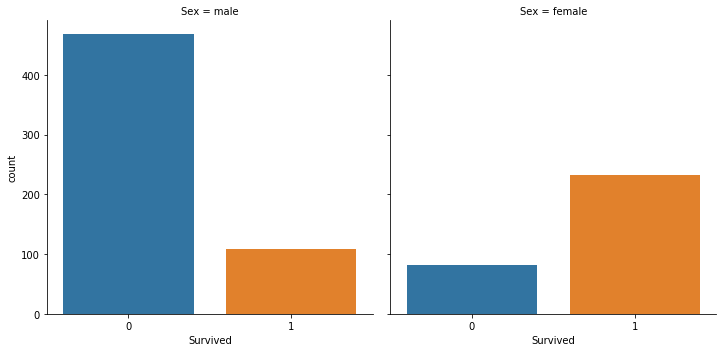

In [16]:
sns.factorplot(x='Survived', col='Sex', kind='count', data=train); 

In [17]:
df['Age'].isnull().sum()

263

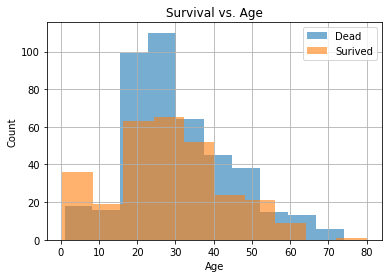

In [18]:
train.groupby('Survived').Age.hist(alpha=0.6,  bins = 10)
plt.title('Survival vs. Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(['Dead','Surived']);

Age and Gender are factors that affect the survival rate. Women had a higher survival rate than men, and younger people were more likely to survive because during the sinking of the Titanic, women and children were prioritized to board the life boats. What I want to do is to explore more of the Titanic data to help fill in the missing values for the column Age. 

# Fill in the Missing Embarked Value

In [19]:
#Examining the unique values in the column Embarked
df['Embarked'].unique()

array(['Q', 'S', 'C', nan], dtype=object)

In [20]:
df['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

Port S has the highest number of people entering through it. 

In [21]:
#Finding the specific missing value for Embarked
df.loc[df['Fare'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
152,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701


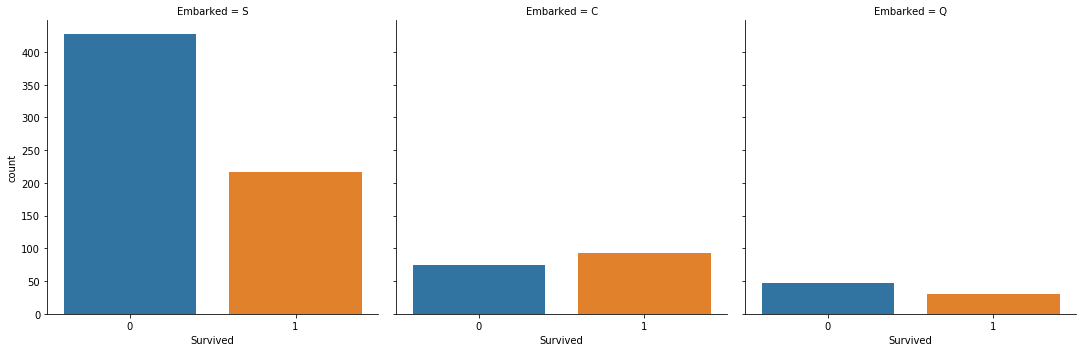

In [22]:
sns.factorplot(x='Survived', col='Embarked', kind='count', data=train);

From the bar graph, there are large number of people that embarked at Port S. Port C had the highest survival rate, and Port Q had the least amount of people embarking there. To fill in the one missing value, I chose to fill in the value with Port S because it was where the highest amount of people embarked. 

In [23]:
df['Embarked'].fillna('S', inplace=True)

In [24]:
df['Embarked'].notnull().sum()

1309

# Filling in the Missing Value for Fare

In [25]:
#Finding the specific null value for Fare
df.loc[df['Fare'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
152,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701


In [26]:
#Average Fare Price by Pclass
df.groupby('Pclass')['Fare'].mean()

Pclass
1    87.508992
2    21.179196
3    13.302889
Name: Fare, dtype: float64

By observing the one null value for Fare, the single database contains information that the passenger was in Pclass 3. I filled in the missing fare value with $13.30 since it was the average Fare in Pclass 3. 

In [27]:
df['Fare'].fillna(13.30, inplace=True)

In [28]:
df.loc[df['PassengerId'] == 1044] 

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
152,60.5,NaN,S,13.3,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701


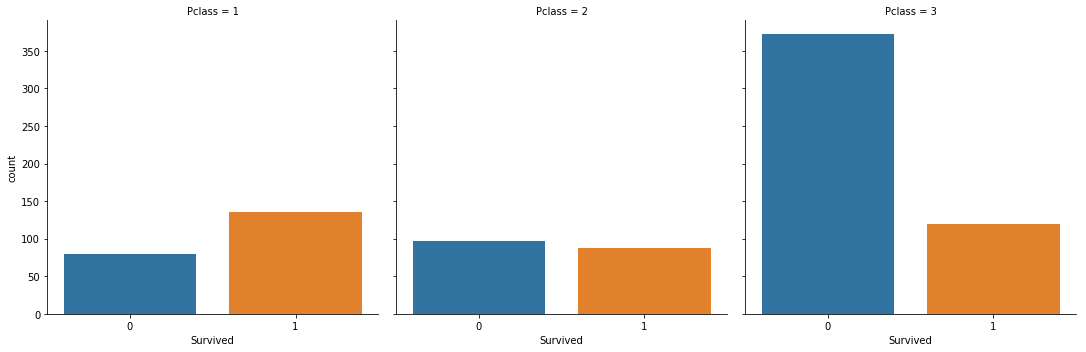

In [29]:
sns.factorplot(x='Survived', col='Pclass', kind='count', data=train); 
#Pclass 1 more likely to survive

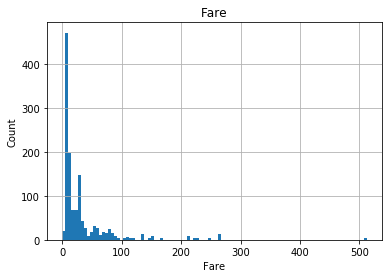

In [30]:
#General distribution plot of Fare
df.hist('Fare', bins=100)
plt.xlabel('Fare')
plt.ylabel('Count');

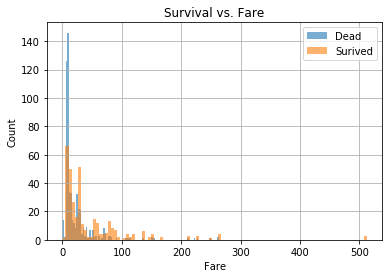

In [31]:
df.groupby('Survived').Fare.hist(alpha=0.6, bins = 100)
plt.title('Survival vs. Fare')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.legend(['Dead','Surived']);
#People who paid higher Fares are more likely to survive. 

# Filling in Missing Values for Cabin 

In [32]:
df['Cabin'].value_counts()

C23 C25 C27        6
B57 B59 B63 B66    5
G6                 5
C78                4
F2                 4
B96 B98            4
F33                4
D                  4
F4                 4
C22 C26            4
A34                3
E34                3
E101               3
B58 B60            3
B51 B53 B55        3
C101               3
C126               2
D10 D12            2
E33                2
B18                2
C83                2
D17                2
C7                 2
C93                2
D19                2
C116               2
C54                2
C80                2
E31                2
C86                2
                  ..
2044               1
D50                1
T                  1
C118               1
D34                1
B52 B54 B56        1
E40                1
B3                 1
B24                1
A6                 1
A36                1
C130               1
A21                1
C82                1
F                  1
B86                1
C132         

In [33]:
df['Cabin'].isnull().sum()

1013

The column Cabin shows the unique cabin locations of where the passengers of the Titanic were assigned to. Because there are so many unique values, I decided to fill in the missing values of Cabin to 'Unkown' for now. 

In [34]:
df['Cabin'].fillna('Unknown', inplace=True)

# Feature Engineering - Fixing Titles to Help Predict Survival 

To help increase the effectiveness of our prediction model, I can use the titles from the names of the passengers to help determine the survival rates of the test dataset. 

In [35]:
#Splitting the Titles from Name
df['Title'] = df['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]

In [36]:
#Examining Title distributions among Females and Males 
pd.crosstab(df['Title'], df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,4
Don,0,1
Dona,1,0
Dr,1,7
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,61


In [37]:
#Creating a dictionary to simplify the titles
d = {"Mr":"Mr",
    "Rev":"Royalty", "Capt":"Royalty", "Jonkheer":"Royalty", "Sir":"Royalty", "Don":"Royalty",
    "Dona":"Royalty", "Lady":"Royalty", "the Countess":"Royalty",
    "Mrs":"Mrs", "Mme":"Mrs",
    "Miss":"Miss", "Mlle": "Miss", "Ms":"Miss",
    "Dr":"Royalty", "Major":"Royalty", "Col":"Royalty",
    "Master": "Master"
    }

In [38]:
#Creating a new column for Title in df
df['Title'] = df['Title'].map(d) 

In [39]:
df['Title'].value_counts()

Mr         757
Miss       264
Mrs        198
Master      61
Royalty     29
Name: Title, dtype: int64

In [40]:
pd.crosstab(df['Title'], df['Sex'])

Sex,female,male
Title,,
Master,0,61
Miss,264,0
Mr,0,757
Mrs,198,0
Royalty,4,25


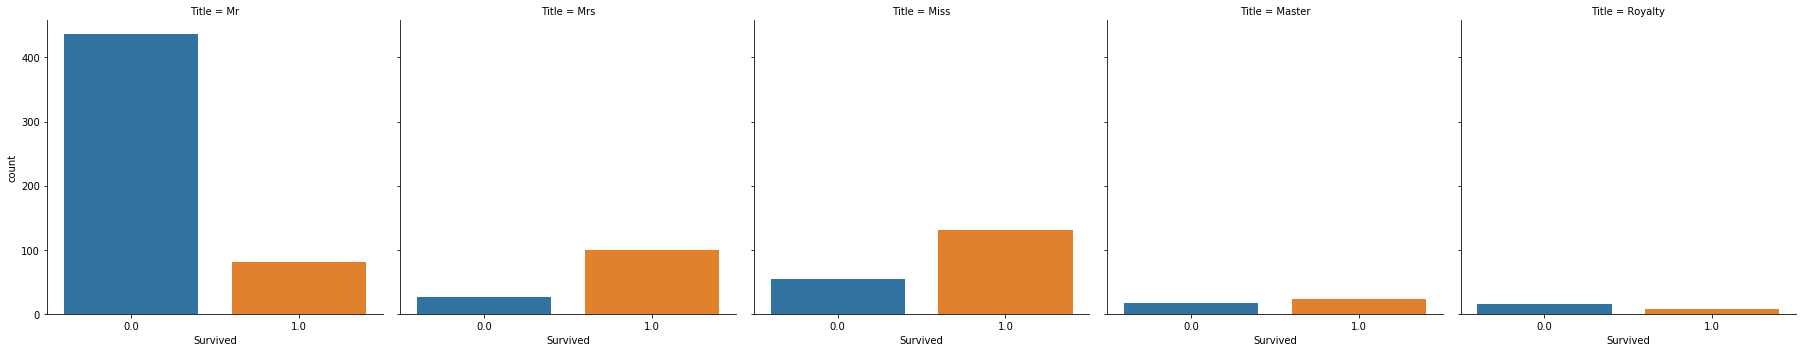

In [41]:
sns.factorplot(x='Survived', col='Title', kind='count', data= df); 

Titles of Mrs, Miss, and Master had higher surivival rates because titles like Miss and Mrs were mainly given to females.   

# Feature Engineering - Adding in Family 

Another feature to be added is Family which is added by combining the number of siblings/spouses, parents/children, and themselves aboard the Titanic. 

In [42]:
df['Family'] = df.SibSp + df.Parch + 1 

In [43]:
df['Family'].head(10)

0    1
1    2
2    1
3    1
4    3
5    1
6    1
7    3
8    1
9    3
Name: Family, dtype: int64

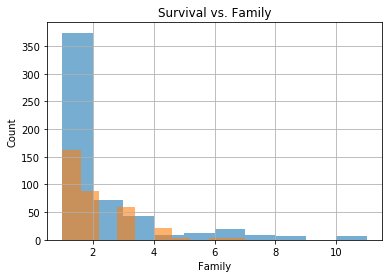

In [44]:
df.groupby('Survived').Family.hist(alpha=0.6);
plt.title('Survival vs. Family')
plt.xlabel('Family')
plt.ylabel('Count');
#People with less family members onboard were more likely to survive

# Adding in Missing Values for Age 

To fill in the missing values for Age, the median of the ages were used and were sorted by Sex, Title, and Pclass. 

In [45]:
df.groupby(['Sex','Title','Pclass'])['Age'].median()

Sex     Title    Pclass
female  Miss     1         30.0
                 2         20.0
                 3         18.0
        Mrs      1         45.0
                 2         30.5
                 3         31.0
        Royalty  1         43.5
male    Master   1          6.0
                 2          2.0
                 3          6.0
        Mr       1         41.5
                 2         30.0
                 3         26.0
        Royalty  1         49.5
                 2         41.5
Name: Age, dtype: float64

In [46]:
df.Age.fillna(df.groupby(['Sex','Title','Pclass']).transform('median').Age, inplace=True)

# Creating Dummy Variables 

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 890
Data columns (total 14 columns):
Age            1309 non-null float64
Cabin          1309 non-null object
Embarked       1309 non-null object
Fare           1309 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
Title          1309 non-null object
Family         1309 non-null int64
dtypes: float64(3), int64(5), object(6)
memory usage: 193.4+ KB


I checked the dataset to see if I had any missing values. The only missing values still left are Survived since that is the data I was trying to predict.

To prepare for the model, I dropped certain columns since I needed to prepare dummy variables. Cabin, Name, PassengerId, and Ticket were dropped since the data was used mainly for unique identification. SibSp and Parch were dropped since I used both of the data to create the column Family. 

In [48]:
#Drop Values First
df.drop(['Cabin'], axis=1, inplace=True)
df.drop(['Name'], axis=1, inplace =True)
df.drop(['PassengerId'], axis=1, inplace =True)
df.drop(['Ticket'], axis=1, inplace=True)
df.drop(['SibSp'], axis=1, inplace=True)
df.drop(['Parch'], axis=1, inplace=True)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 890
Data columns (total 8 columns):
Age         1309 non-null float64
Embarked    1309 non-null object
Fare        1309 non-null float64
Pclass      1309 non-null int64
Sex         1309 non-null object
Survived    891 non-null float64
Title       1309 non-null object
Family      1309 non-null int64
dtypes: float64(3), int64(2), object(3)
memory usage: 132.0+ KB


In [50]:
#Changed Pclass from numerical data to categorical data 
df['Pclass'] = df['Pclass'].astype('category')

In [51]:
#Created dummy variables 
df_dummies = pd.get_dummies(df, drop_first=True)

In [52]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 890
Data columns (total 13 columns):
Age              1309 non-null float64
Fare             1309 non-null float64
Survived         891 non-null float64
Family           1309 non-null int64
Embarked_Q       1309 non-null uint8
Embarked_S       1309 non-null uint8
Pclass_2         1309 non-null uint8
Pclass_3         1309 non-null uint8
Sex_male         1309 non-null uint8
Title_Miss       1309 non-null uint8
Title_Mr         1309 non-null uint8
Title_Mrs        1309 non-null uint8
Title_Royalty    1309 non-null uint8
dtypes: float64(3), int64(1), uint8(9)
memory usage: 102.6 KB


# Splitting the Data to Train and Test 

The dataset is split back into two datasets, the test and the train dataset. The train dataset will be be used to train the model for prediction.

In [53]:
df_test = df_dummies[:418]

In [54]:
df_test.head(10)

,Age,Fare,Survived,Family,Embarked_Q,Embarked_S,Pclass_2,Pclass_3,Sex_male,Title_Miss,Title_Mr,Title_Mrs,Title_Royalty
0,34.5,7.8292,NaN,1,1,0,0,1,1,0,1,0,0
1,47.0,7.0000,NaN,2,0,1,0,1,0,0,0,1,0
2,62.0,9.6875,NaN,1,1,0,1,0,1,0,1,0,0
3,27.0,8.6625,NaN,1,0,1,0,1,1,0,1,0,0
4,22.0,12.2875,NaN,3,0,1,0,1,0,0,0,1,0
5,14.0,9.2250,NaN,1,0,1,0,1,1,0,1,0,0
6,30.0,7.6292,NaN,1,1,0,0,1,0,1,0,0,0
7,26.0,29.0000,NaN,3,0,1,1,0,1,0,1,0,0
8,18.0,7.2292,NaN,1,0,0,0,1,0,0,0,1,0
9,21.0,24.1500,NaN,3,0,1,0,1,1,0,1,0,0


In [55]:
df_train = df_dummies[418:]

In [56]:
df_train.head(10)

,Age,Fare,Survived,Family,Embarked_Q,Embarked_S,Pclass_2,Pclass_3,Sex_male,Title_Miss,Title_Mr,Title_Mrs,Title_Royalty
0,22.0,7.2500,0.0,2,0,1,0,1,1,0,1,0,0
1,38.0,71.2833,1.0,2,0,0,0,0,0,0,0,1,0
2,26.0,7.9250,1.0,1,0,1,0,1,0,1,0,0,0
3,35.0,53.1000,1.0,2,0,1,0,0,0,0,0,1,0
4,35.0,8.0500,0.0,1,0,1,0,1,1,0,1,0,0
5,26.0,8.4583,0.0,1,1,0,0,1,1,0,1,0,0
6,54.0,51.8625,0.0,1,0,1,0,0,1,0,1,0,0
7,2.0,21.0750,0.0,5,0,1,0,1,1,0,0,0,0
8,27.0,11.1333,1.0,3,0,1,0,1,0,0,0,1,0
9,14.0,30.0708,1.0,2,0,0,1,0,0,0,0,1,0


In [57]:
df_test.shape, df_train.shape

((418, 13), (891, 13))

# Making Predictions

In [58]:
#Import libraries
from sklearn.naive_bayes import GaussianNB
g = GaussianNB()
from sklearn.naive_bayes import BernoulliNB
b = BernoulliNB()
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
from sklearn.tree import DecisionTreeClassifier
d=DecisionTreeClassifier()
from sklearn.ensemble import RandomForestClassifier
r = RandomForestClassifier()
from sklearn.neighbors import KNeighborsClassifier
k=KNeighborsClassifier()
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()

algorithms=[g,b,k,log,d,r,clf]
names=['GaussianNB','BernoulliNB','K Nearest','Logistic','Decision Tree',
      'Random Forest','Gradient Boost']

In [59]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [60]:
#Setting up Training and Prediction variables 
X = df_train.drop(['Survived'], axis = 1)
y = df_train['Survived']
xtest = df_test.drop(['Survived'], axis = 1)
ytest = df_test['Survived']

In [61]:
x_test, x_train, y_test, y_train =train_test_split(X, y, test_size=.8, random_state=41)

In [62]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((713, 12), (713,), (178, 12), (178,))

In [63]:
#Called a function to find Accuracy, Precision, Recall, and F1_Score
def tDMassess(x_train, y_train, algorithms = algorithms, names = names):
    # fit the data
    for i in range(len(algorithms)):
        algorithms[i] = algorithms[i].fit(x_train, y_train)
    # print metrics
    accuracy = []
    precision = []
    recall = []
    f1 = []
    for i in range(len(algorithms)):
        if accuracy_score(y_train, algorithms[i].predict(x_train)) == 1:
            accuracy.append(0)
        else:   
            accuracy.append(accuracy_score(y_train, algorithms[i].predict(x_train)))
        if precision_score(y_train, algorithms[i].predict(x_train)) == 1:
            precision.append(0)
        else:   
            precision.append(accuracy_score(y_train, algorithms[i].predict(x_train)))
        if recall_score(y_train, algorithms[i].predict(x_train)) == 1:
            recall.append(0)
        else:   
            recall.append(accuracy_score(y_train, algorithms[i].predict(x_train)))
        if f1_score(y_train, algorithms[i].predict(x_train)) == 1:
            f1.append(0)
        else:   
            f1.append(accuracy_score(y_train, algorithms[i].predict(x_train)))
    metrics = pd.DataFrame(columns = ['Accuracy', 'Precision', 'Recall', 'F1'], index = names)
    metrics['Accuracy'] = accuracy
    metrics['Precision'] = precision
    metrics['Recall'] = recall
    metrics['F1'] = f1
    return metrics.sort_values('F1', ascending = False)

In [64]:
tDMassess(x_train, y_train, algorithms = algorithms, names = names)

,Accuracy,Precision,Recall,F1
Decision Tree,0.983170,0.983170,0.983170,0.983170
Random Forest,0.964937,0.964937,0.964937,0.964937
Gradient Boost,0.957924,0.957924,0.957924,0.957924
Logistic,0.823282,0.823282,0.823282,0.823282
K Nearest,0.809257,0.809257,0.809257,0.809257
BernoulliNB,0.796634,0.796634,0.796634,0.796634
GaussianNB,0.793829,0.793829,0.793829,0.793829


Out all the classification models to use for prediction, Decision Tree, Gradient Boost, and Random Forest have the highest scores for Accuracy, Precision, Recall, and F1. I went ahead and used the Gradient Boost Classifier for setting up the survival prediction of the test dataset. 

In [65]:
#Fitting the data
gbc.fit(x_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [66]:
gbc.score(x_test, y_test)

0.8426966292134831

In [67]:
#Predicting who will survive in the Test Dataset 
prediction = gbc.predict(xtest)

Text(0.5, 0, 'Relative Importance')

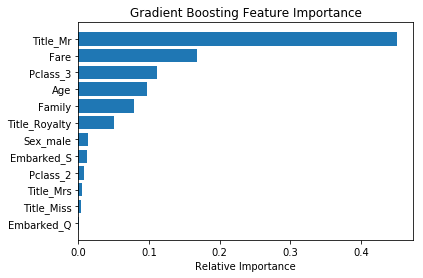

In [68]:
features = X.columns
importances = gbc.feature_importances_
indices = np.argsort(importances)

plt.figure(1)
plt.title('Gradient Boosting Feature Importance')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

In [69]:
prediction.mean(), prediction.min(), prediction.max()

(0.3492822966507177, 0.0, 1.0)

# Creating the Kaggle Submission 

In [70]:
passengerid=test['PassengerId']

In [71]:
kaggle=pd.DataFrame({'PassengerId':passengerid, 'Survived':prediction.astype(int)})

In [72]:
kaggle.to_csv('Predictions.csv',index=False)

In [73]:
kaggle.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
